<a href="https://colab.research.google.com/github/MohammadEslamiNezhad/Amazon-Sales-Data-Analysis-and-Profit-Prediction/blob/main/Amazon_Sales_Data_Analysis_and_Profit_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import dependencies

In [3]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor # استفاده از RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [18]:
# Loading the dataset from a CSV file
dataset = pd.read_csv('./AmazonSalesData.csv')

# data manipulation

In [19]:
# Displaying the first 5 rows of the dataset
display(dataset.head())

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [5]:
# Displaying information about the dataset, including non-null counts and data types
display(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


None

In [6]:
# Function to convert date columns to datetime format and extract day, weekday, month, and year
def to_datetime(df, date_columns) :
    for col in date_columns :
        # Converting the date column to DatetimeIndex
        order_date_idx = pd.DatetimeIndex(df[col])
        order_date_col = np.array(order_date_idx)
        df[col] = order_date_col
        # Extracting day, weekday, month, and year
        day, weekday, month, year = [], [], [], []
        for idx in range(len(df)) : # استفاده از len(df) به جای عدد ثابت 100
            # Splitting the date
            dayx = df[col][idx].day
            weekdayx = df[col][idx].weekday()
            monthx = df[col][idx].month
            yearx = df[col][idx].year
            # Appending to lists
            day.append(dayx)
            weekday.append(weekdayx)
            month.append(monthx)
            year.append(yearx)

        # Creating new columns for day, weekday, month, and year
        day_col = col + ' ' + 'Day'
        weekday_col = col + ' ' + 'weekday'
        month_col = col + ' ' + 'Month'
        year_col = col + ' ' + 'Year'

        df[day_col] = day
        df[weekday_col] = weekday
        df[month_col] = month
        df[year_col] = year
    return df

In [7]:
# Applying the to_datetime function to 'Order Date' and 'Ship Date' columns
dataset = to_datetime(dataset, ['Order Date', 'Ship Date'])
# Displaying the updated dataset information
display(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Region              100 non-null    object        
 1   Country             100 non-null    object        
 2   Item Type           100 non-null    object        
 3   Sales Channel       100 non-null    object        
 4   Order Priority      100 non-null    object        
 5   Order Date          100 non-null    datetime64[ns]
 6   Order ID            100 non-null    int64         
 7   Ship Date           100 non-null    datetime64[ns]
 8   Units Sold          100 non-null    int64         
 9   Unit Price          100 non-null    float64       
 10  Unit Cost           100 non-null    float64       
 11  Total Revenue       100 non-null    float64       
 12  Total Cost          100 non-null    float64       
 13  Total Profit        100 non-null    float64       


None

In [8]:
# Selecting numeric columns for descriptive statistics
numeric_cols = ['Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'] # اضافه کردن ستون های مالی اصلی
# Calculating descriptive statistics for numeric columns
describe_df = dataset[numeric_cols].describe().T
# Dropping the 'count' column
describe_df.drop('count', inplace = True, axis = 1)
# Calculating the Range
describe_df['R'] = describe_df['max'] - describe_df['min']
# Calculating Variance (std^2)
describe_df['std^2'] = describe_df['std'] ** 2
# Calculating Coefficient of Variation (CV)
describe_df['CV'] = describe_df['std'] / describe_df['mean'] * 100
# Displaying the calculated descriptive statistics
display(describe_df)

,mean,std,min,25%,50%,75%,max,R,std^2,CV
Units Sold,5.128710e+03,2.794485e+03,124.00,2836.2500,5382.500,7.369000e+03,9925.00,9801.00,7.809144e+06,54.487085
Unit Price,2.767613e+02,2.355922e+02,9.33,81.7300,179.880,4.372000e+02,668.27,658.94,5.550370e+04,85.124705
Unit Cost,1.910480e+02,1.882082e+02,6.92,35.8400,107.275,2.633300e+02,524.96,518.04,3.542232e+04,98.513557
Total Revenue,1.373488e+06,1.460029e+06,4870.26,268721.2125,752314.360,2.212045e+06,5997054.98,5992184.72,2.131684e+12,106.300823
Total Cost,9.318057e+05,1.083938e+06,3612.24,168868.0275,363566.385,1.613870e+06,4509793.96,4506181.72,1.174922e+12,116.326639
Total Profit,4.416820e+05,4.385379e+05,1258.02,121443.5850,290767.995,6.358288e+05,1719922.04,1718664.02,1.923155e+11,99.288158


In [9]:
# Columns used for grouping
grouper_columns = ['Order Priority', 'Sales Channel', 'Item Type', 'Country', 'Region']
# Columns used for data analysis (sums)
sum_data_columns = ['Units Sold', 'Total Revenue', 'Total Cost', 'Total Profit']

# Grouping data by each of the grouper_columns and calculating the sum of sum_data_columns
data_grouped = []
for col in grouper_columns :
    # ایجاد یک لیست موقت شامل ستون grouper و ستون های sum_data_columns
    cols_to_group = [col] + sum_data_columns
    grouped = dataset[cols_to_group].groupby(by = col).sum()
    data_grouped.append(grouped)

# Displaying the grouped data (اختیاری، برای نمایش همه از display در حلقه استفاده کنید)
# display(data_grouped)

# Data Visualization

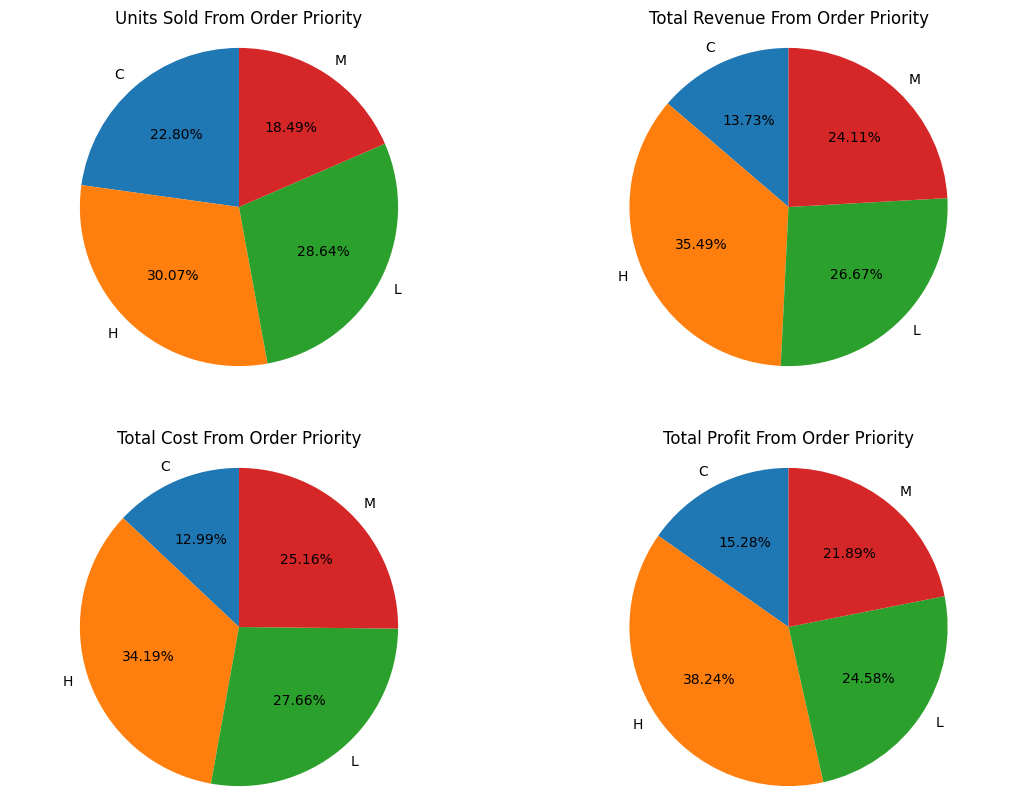

Correlation Matrix for Order Priority:


,Units Sold,Total Revenue,Total Cost,Total Profit
Units Sold,1.000000,0.623661,0.572422,0.690648
Total Revenue,0.623661,1.000000,0.990987,0.965765
Total Cost,0.572422,0.990987,1.000000,0.922308
Total Profit,0.690648,0.965765,0.922308,1.000000


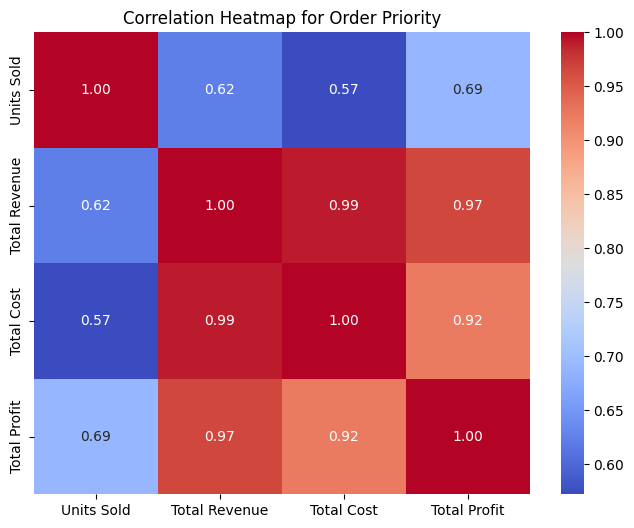

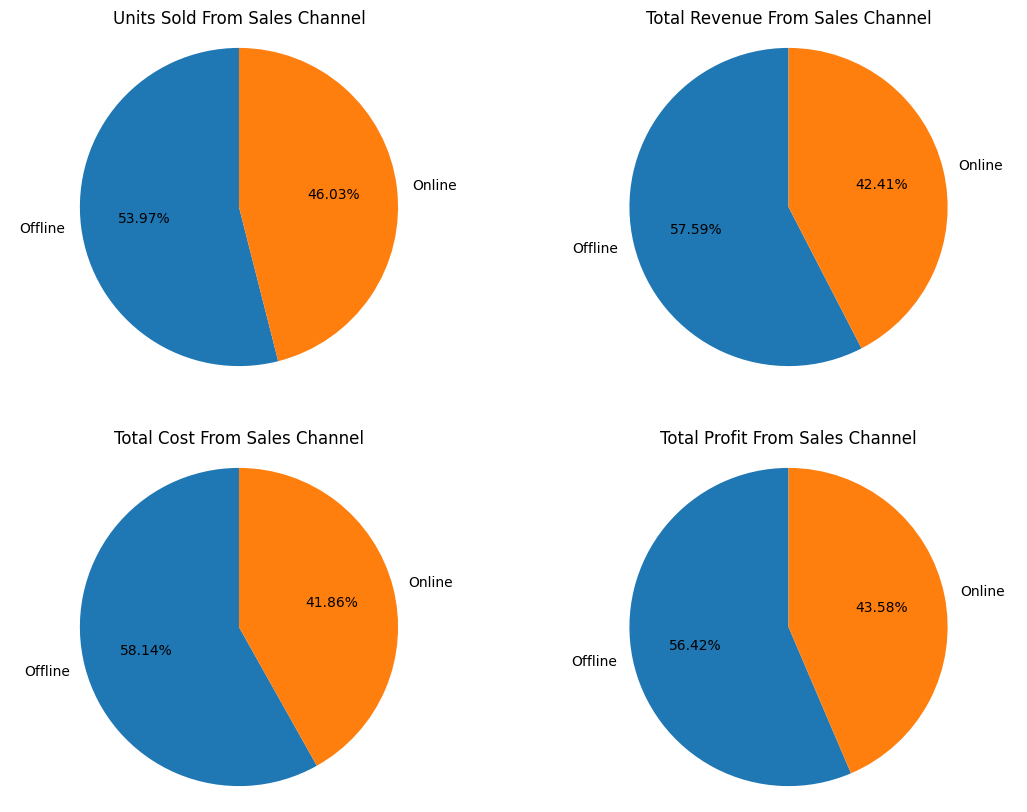

Correlation Matrix for Sales Channel:


,Units Sold,Total Revenue,Total Cost,Total Profit
Units Sold,1.0,1.0,1.0,1.0
Total Revenue,1.0,1.0,1.0,1.0
Total Cost,1.0,1.0,1.0,1.0
Total Profit,1.0,1.0,1.0,1.0


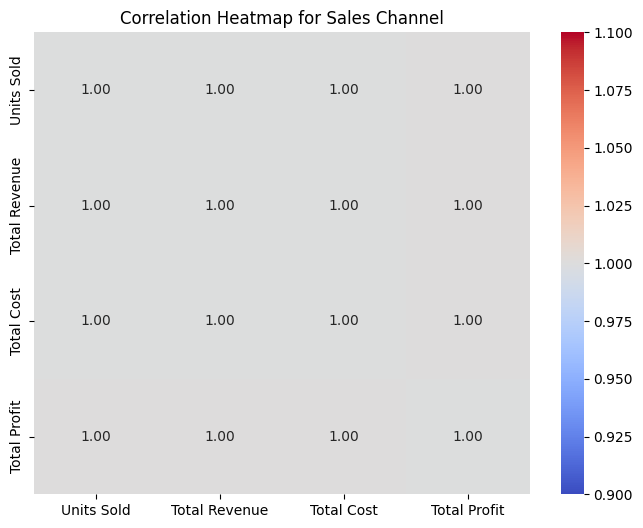

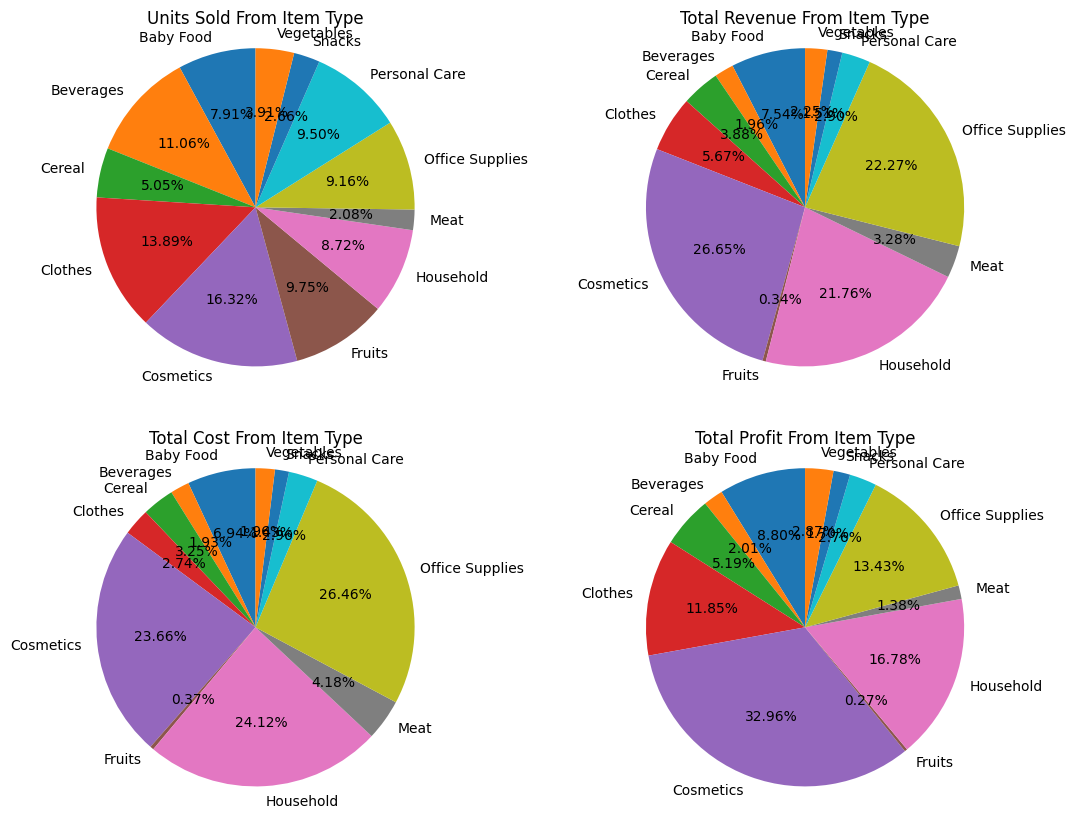

Correlation Matrix for Item Type:


,Units Sold,Total Revenue,Total Cost,Total Profit
Units Sold,1.000000,0.498851,0.391264,0.671652
Total Revenue,0.498851,1.000000,0.981663,0.904156
Total Cost,0.391264,0.981663,1.000000,0.806142
Total Profit,0.671652,0.904156,0.806142,1.000000


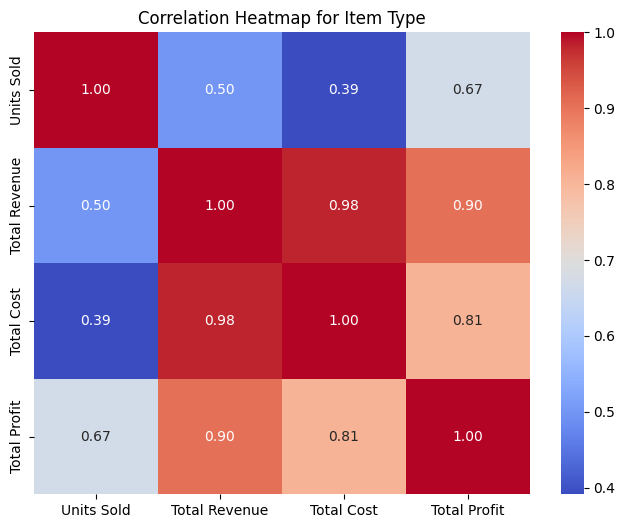

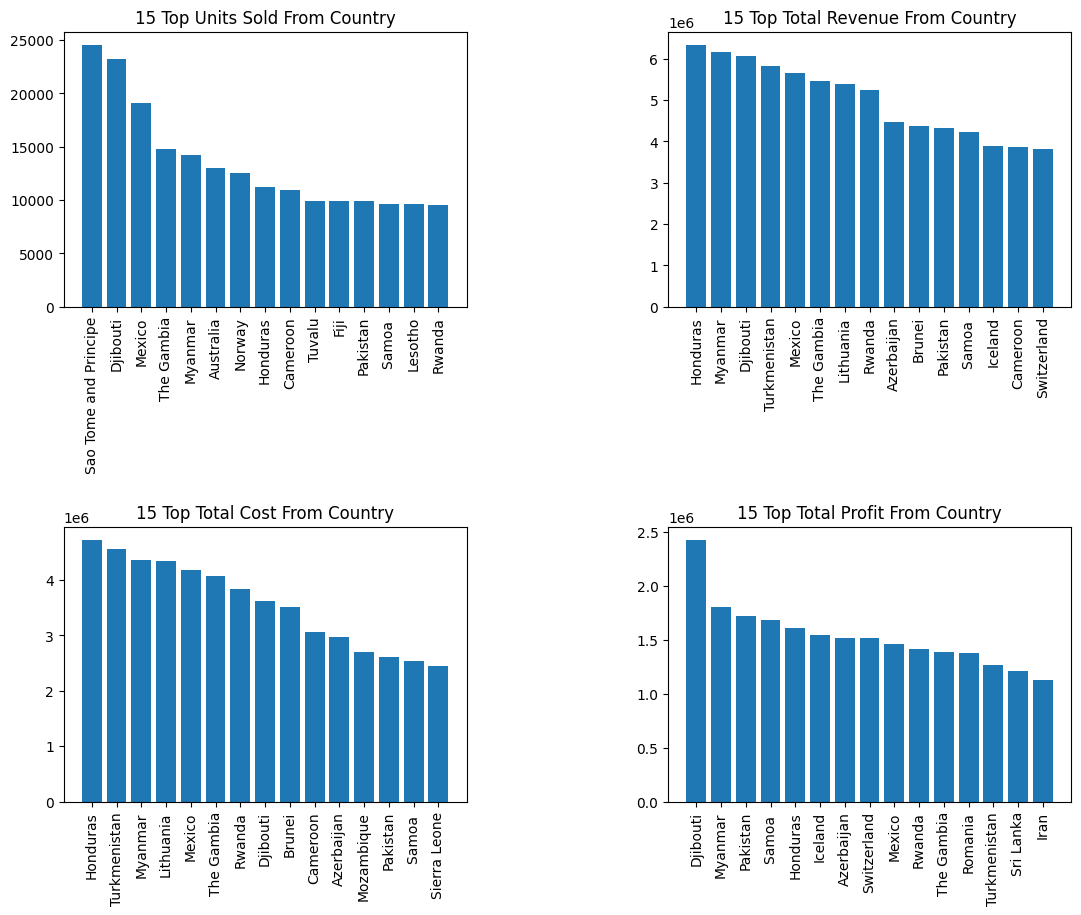

Correlation Matrix for Country:


,Units Sold,Total Revenue,Total Cost,Total Profit
Units Sold,1.000000,0.584761,0.542676,0.624916
Total Revenue,0.584761,1.000000,0.987578,0.921350
Total Cost,0.542676,0.987578,1.000000,0.848824
Total Profit,0.624916,0.921350,0.848824,1.000000


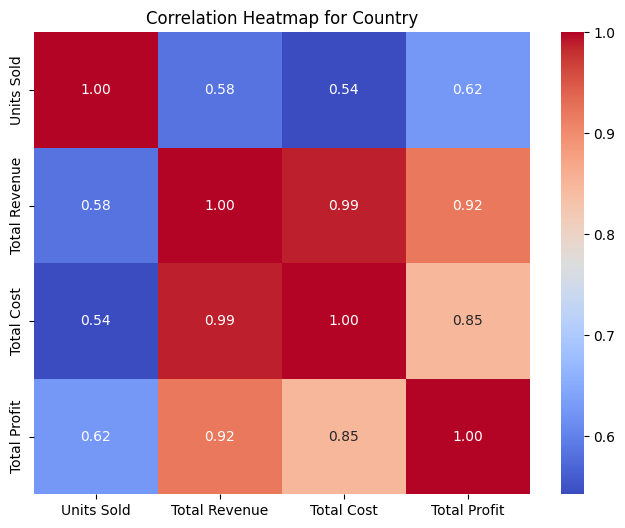

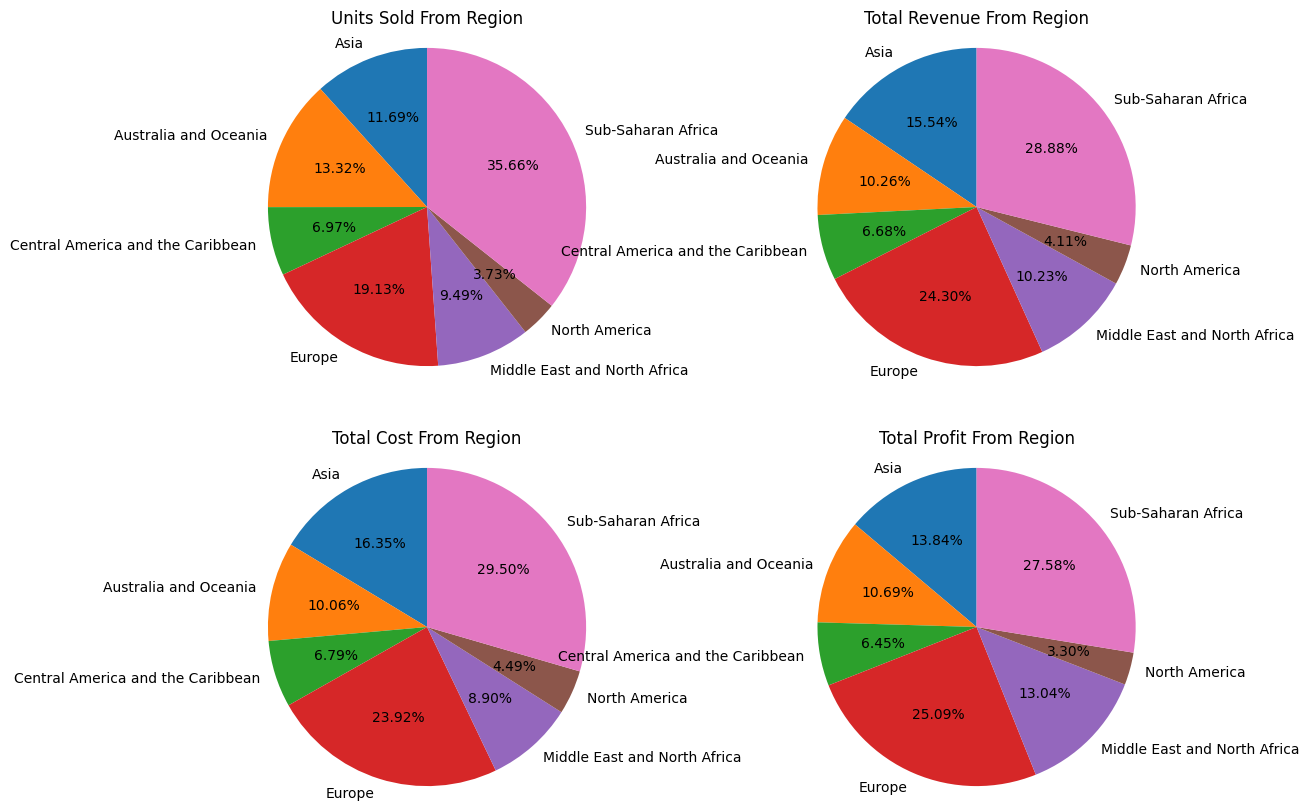

Correlation Matrix for Region:


,Units Sold,Total Revenue,Total Cost,Total Profit
Units Sold,1.000000,0.926919,0.928860,0.903990
Total Revenue,0.926919,1.000000,0.997122,0.986144
Total Cost,0.928860,0.997122,1.000000,0.970729
Total Profit,0.903990,0.986144,0.970729,1.000000


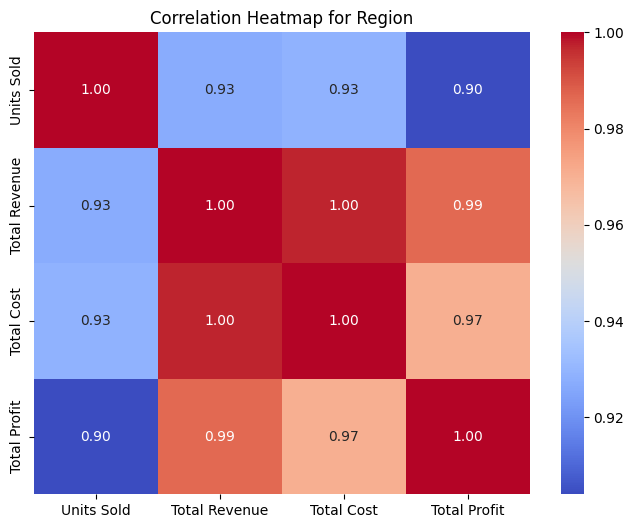

In [10]:
# Plotting the grouped data and correlation matrices
for df in data_grouped:
    plt.figure(figsize=(13, 10))
    idx = df.index.name
    i = 0
    for col in sum_data_columns: # استفاده از sum_data_columns برای ستون های مورد نظر جهت رسم
        i += 1
        plt.subplot(2, 2, i)
        title = f'{col} From {idx}'
        visual_data = df[col]
        visual_labels = visual_data.index
        # Use a pie chart if the number of categories is less than 15 (افزایش حد برای نمایش بهتر)
        if len(visual_labels) < 15:
            plt.pie(visual_data, labels=visual_labels, autopct='%1.2f%%', startangle=90)
            plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
        # Otherwise, display the top 15 in a bar chart (افزایش حد برای نمایش بهتر)
        else:
            title = f'15 Top {col} From {idx}'
            visual_data = df[col].sort_values(ascending=False).head(15)
            visual_labels = visual_data.index
            plt.subplots_adjust(hspace=0.8, wspace=0.5)
            plt.tick_params(axis='x', labelrotation=90)
            plt.bar(x=visual_labels, height=visual_data)

        plt.title(title)
    plt.show()

    # Calculating and displaying the correlation matrix
    print(f"Correlation Matrix for {idx}:")
    corr_matrix = df.corr()
    display(corr_matrix)
    # Plotting the heatmap of the correlation matrix
    plt.figure(figsize=(8, 6)) # اندازه مناسب تر برای heatmap
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f") # نمایش مقادیر و colormap
    plt.title(f'Correlation Heatmap for {idx}')
    plt.show()

In [11]:
# Calculating the correlation matrix for the main data columns
main_data_corr = dataset[sum_data_columns].corr()
display(main_data_corr)

,Units Sold,Total Revenue,Total Cost,Total Profit
Units Sold,1.000000,0.447784,0.374746,0.564550
Total Revenue,0.447784,1.000000,0.983928,0.897327
Total Cost,0.374746,0.983928,1.000000,0.804091
Total Profit,0.564550,0.897327,0.804091,1.000000


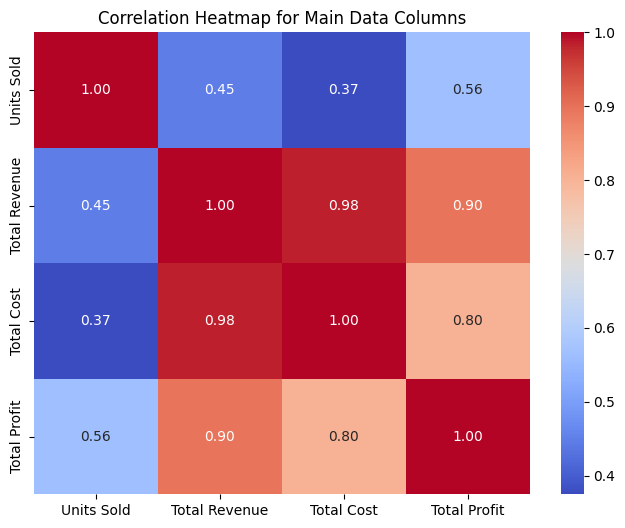

In [12]:
# Plotting the heatmap of the correlation matrix for the main data columns
plt.figure(figsize=(8, 6)) # اندازه مناسب تر
sns.heatmap(main_data_corr, annot=True, cmap='coolwarm', fmt=".2f") # نمایش مقادیر و colormap
plt.title('Correlation Heatmap for Main Data Columns')
plt.show()

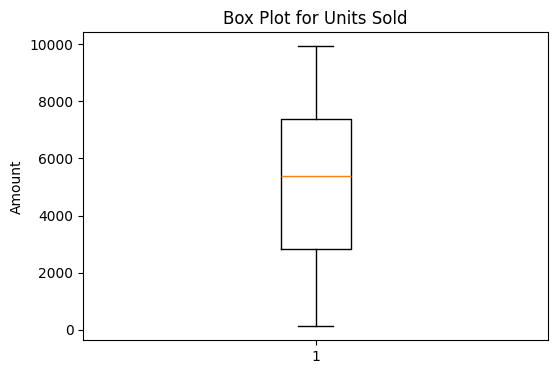

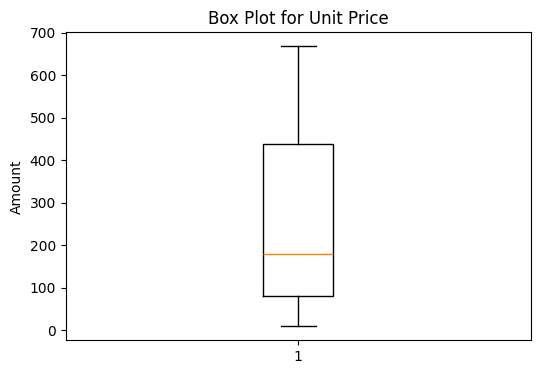

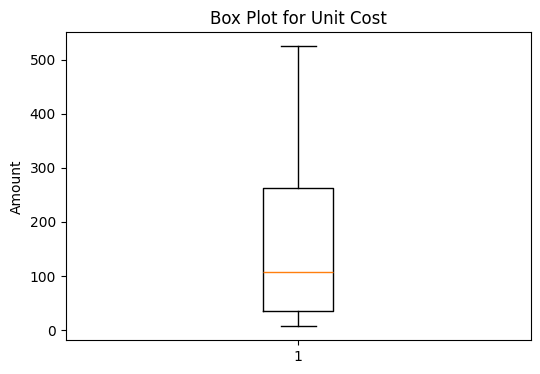

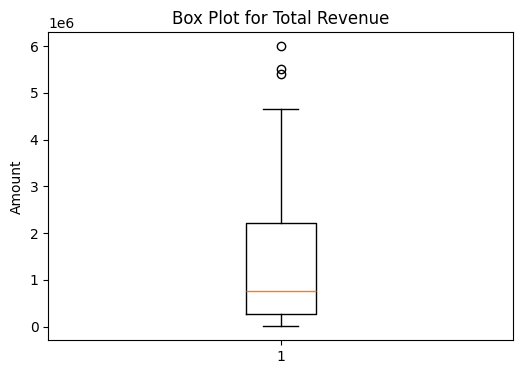

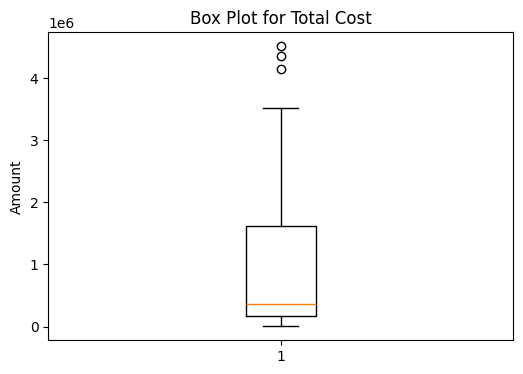

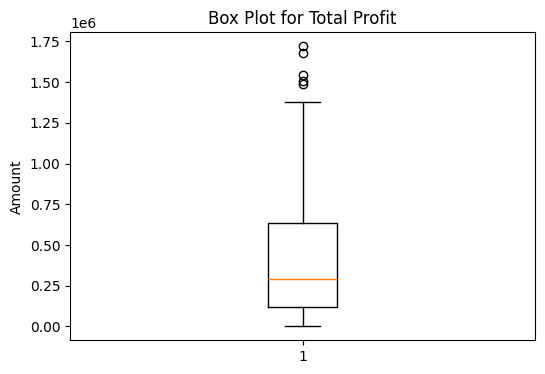

In [13]:
# Plotting box plots for numeric columns to identify outliers
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    plt.boxplot(dataset[col])
    plt.title(f'Box Plot for {col}')
    plt.ylabel('Amount')
    plt.show()

Temporal Analysis (Monthly Sums):


,Units Sold,Total Revenue,Total Cost,Total Profit
OrderYearMonth,,,,
2010-02,9503,3410661.12,1986250.18,1424410.94
2010-05,15747,2587973.26,1622531.74,965441.52
2010-06,9905,1082418.40,354995.20,727423.20
2010-10,14403,6064933.75,4569540.96,1495392.79
2010-11,7910,3458252.00,2082940.30,1375311.70
2010-12,4103,2581786.39,1940199.11,641587.28
2011-01,12914,1042225.35,678716.31,363509.04
2011-02,8156,387002.20,259279.24,127722.96
2011-04,4187,2798046.49,2104134.98,693911.51


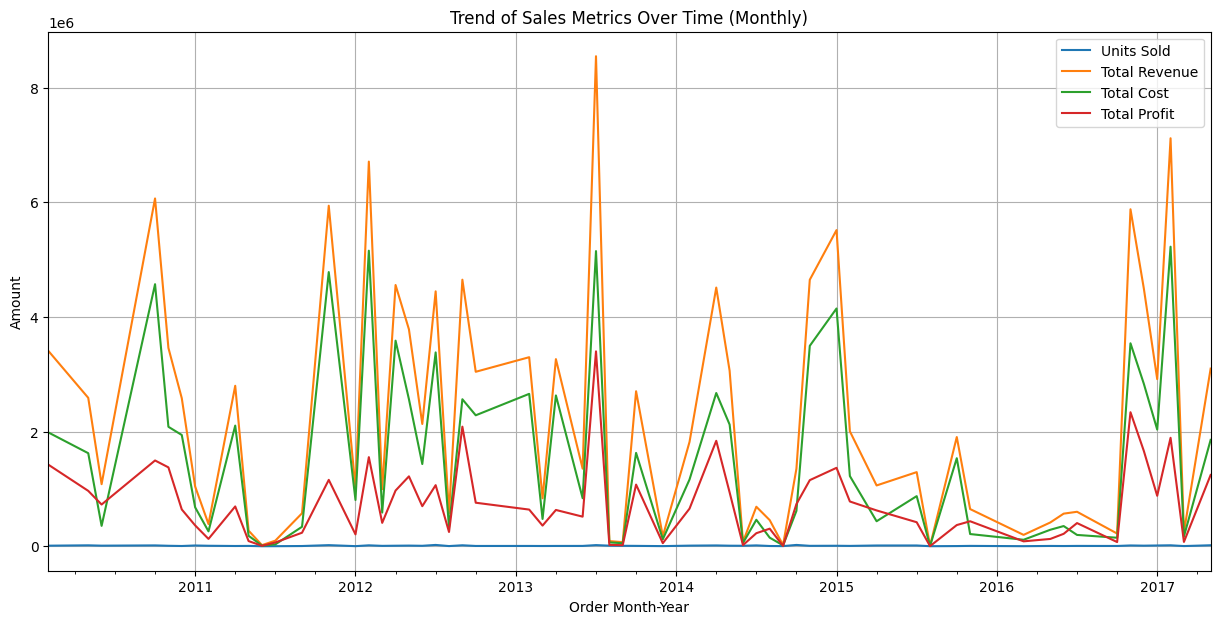

In [14]:
# استخراج ماه و سال از تاریخ سفارش
dataset['OrderYearMonth'] = dataset['Order Date'].dt.to_period('M')

# گروه‌بندی بر اساس ماه و سال سفارش و محاسبه مجموع ستون‌های مالی
temporal_analysis = dataset.groupby('OrderYearMonth')[sum_data_columns].sum() # استفاده از sum_data_columns

# نمایش نتایج
print("Temporal Analysis (Monthly Sums):")
display(temporal_analysis)

# رسم نمودار روند زمانی
temporal_analysis.plot(figsize=(15, 7))
plt.title('Trend of Sales Metrics Over Time (Monthly)')
plt.xlabel('Order Month-Year')
plt.ylabel('Amount')
plt.grid(True)
plt.show()

# Prediction Model

In [15]:
# آماده‌سازی داده‌ها برای مدل یادگیری ماشین شامل تبدیل و وینسورایزینگ

# انتخاب ستون هدف (y) و ویژگی‌های ورودی (X)
target = 'Total Profit'
# ویژگی‌ها شامل ستون‌های اصلی به اضافه ستون‌های زمانی است
# features = ['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
#             'Units Sold', 'Unit Price', 'Unit Cost', 'Order Date Month', 'Order Date Year'] # این لیست دیگر به طور مستقیم استفاده نمی شود برای ایجاد X

# ستون های عددی که ممکن است نیاز به تبدیل و/یا وینسورایزینگ داشته باشند (ویژگی‌های ورودی عددی)
numerical_features_to_process = ['Units Sold', 'Unit Price', 'Unit Cost'] # فقط ویژگی‌های ورودی عددی را انتخاب کنید
# ستون‌های دسته‌ای
categorical_features = ['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority']
# ستون‌های زمانی که عددی هستند
temporal_numerical_features = ['Order Date Month', 'Order Date Year']


# اعمال تبدیل لگاریتمی (log1p) و وینسورایزینگ بر روی ستون‌های عددی ورودی انتخاب شده در dataset
# از dataset.copy() استفاده کنید تا از SettingWithCopyWarning جلوگیری شود
dataset_processed = dataset.copy()

def winsorize_data(series, lower_percentile=5, upper_percentile=95):
    # اطمینان از اینکه سری خالی نیست
    if series.empty:
        return series
    lower_bound = series.quantile(lower_percentile / 100)
    upper_bound = series.quantile(upper_percentile / 100)
    return series.clip(lower=lower_bound, upper=upper_bound)

for col in numerical_features_to_process:
    # بررسی و اعمال تبدیل لگاریتمی در صورت لزوم (فقط برای مقادیر نامنفی)
    if (dataset_processed[col] >= 0).all():
        # بررسی وجود مقادیر غیر صفر قبل از log1p برای جلوگیری از Inf
        if (dataset_processed[col] > 0).any():
             dataset_processed[col + '_log'] = np.log1p(dataset_processed[col])
             # اعمال وینسورایزینگ بر روی ستون لگاریتمی شده
             dataset_processed[col + '_log_winsorized'] = winsorize_data(dataset_processed[col + '_log'])
        else: # اگر همه مقادیر صفر هستند، log1p آنها نیز صفر است
             dataset_processed[col + '_log_winsorized'] = np.log1p(dataset_processed[col])

    else:
        # اگر ستون حاوی مقادیر منفی است، شاید تبدیل لگاریتمی مناسب نباشد، اما می‌توان وینسورایزینگ مستقیم انجام داد
        dataset_processed[col + '_winsorized'] = winsorize_data(dataset_processed[col])


# آماده‌سازی ویژگی‌ها (X) و هدف (y) با استفاده از داده‌های پردازش شده
# استفاده از ستون‌های تبدیل شده و وینسورایز شده و ستون‌های عددی دیگر و دسته‌ای
# لیست نهایی ویژگی‌های عددی برای ColumnTransformer
numerical_features_for_transformer = [col + '_log_winsorized' for col in numerical_features_to_process if col + '_log_winsorized' in dataset_processed.columns] + \
                                     [col + '_winsorized' for col in numerical_features_to_process if col + '_winsorized' in dataset_processed.columns] + \
                                     temporal_numerical_features # اضافه کردن ستون‌های زمانی عددی

# ایجاد مجموعه ویژگی‌ها (X) و هدف (y)
X = dataset_processed[numerical_features_for_transformer + categorical_features]
y = dataset_processed[target]


# به‌روز رسانی لیست ستون‌های دسته‌ای و عددی برای ColumnTransformer
# ستون‌های دسته‌ای همان قبلی‌ها هستند
categorical_features_for_transformer = categorical_features
# ستون‌های عددی برای ColumnTransformer همان لیست نهایی ویژگی‌های عددی است که در بالا ایجاد کردیم


# ایجاد ترانسفورماتور برای پیش‌پردازش ستون‌ها
# توجه: حالا تبدیل لگاریتمی و وینسورایزینگ قبل از ColumnTransformer انجام شده است،
# ColumnTransformer فقط مقیاس‌بندی و One-Hot Encoding را انجام می‌دهد.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features_for_transformer),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features_for_transformer)])

# اعمال پیش‌پردازش بر روی داده‌ها
X_processed = preprocessor.fit_transform(X)

# نمایش شکل داده‌های پیش‌پردازش شده
print("Shape of processed data:", X_processed.shape)

# تقسیم داده‌ها به مجموعه‌های آموزشی و آزمایشی (با استفاده از y به عنوان هدف اصلی)
# اگر می‌خواهید سود تبدیل شده را پیش‌بینی کنید، باید در زمان ارزیابی، پیش‌بینی‌ها را به مقیاس اصلی برگردانید.
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.3, random_state=42)

# حالا می توانیم مدل رگرسیون را بر روی این داده ها آموزش دهیم.

Shape of processed data: (100, 106)


In [16]:
# آموزش مدل RandomForestRegressor و ارزیابی آن

# model = LinearRegression() # مدل رگرسیون خطی قبلی
model = RandomForestRegressor(n_estimators=100, random_state=42) # استفاده از RandomForestRegressor
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)

# Calculate regression metrics
mae = mean_absolute_error(y_test, y_predicted)
mse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 Score): {r2}")

Mean Absolute Error (MAE): 68869.91201000004
Mean Squared Error (MSE): 8425779130.252639
R-squared (R2 Score): 0.9431311866037477


# Results

Top 10 Feature Importances:


,0
Units Sold_log_winsorized,0.375348
Unit Price_log_winsorized,0.318303
Item Type_Cosmetics,0.187945
Unit Cost_log_winsorized,0.047349
Order Date Month,0.017732
Order Date Year,0.006406
Country_Honduras,0.006389
Region_Sub-Saharan Africa,0.004154
Item Type_Baby Food,0.003166
Country_Rwanda,0.002532


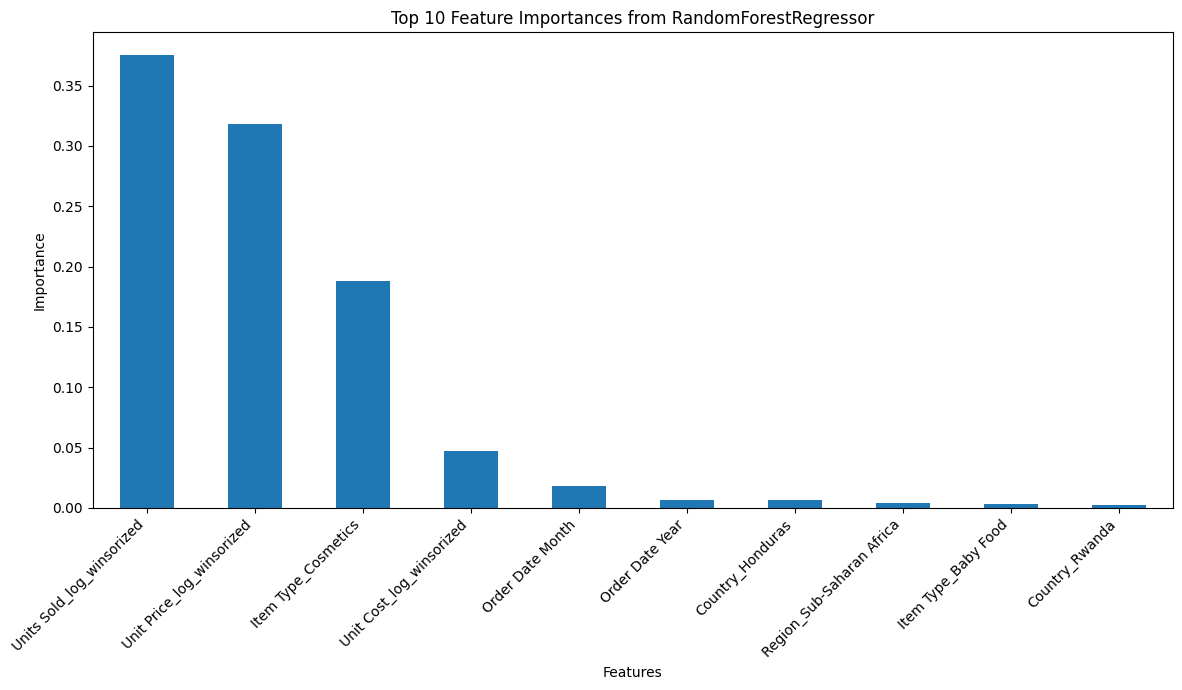

In [17]:
# بررسی اهمیت ویژگی‌ها در مدل RandomForestRegressor

# model متغیر مدل آموزش دیده از سلول قبلی است
feature_importances = model.feature_importances_

# نام ویژگی‌ها را از ColumnTransformer استخراج می‌کنیم
# این بخش کمی پیچیده است زیرا ColumnTransformer نام ستون‌ها را بعد از تبدیل تغییر می‌دهد
# نیاز داریم نام ویژگی‌های اصلی را به نام ویژگی‌های پس از One-Hot Encoding نگاشت کنیم.

# دریافت نام ویژگی‌های عددی پس از مقیاس‌بندی
numerical_feature_names = numerical_features_for_transformer

# دریافت نام ویژگی‌های دسته‌ای پس از One-Hot Encoding
# این بخش به نسخه‌های sklearn بستگی دارد، این روش برای نسخه‌های جدیدتر است
try:
    # برای sklearn >= 1.0
    categorical_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features_for_transformer)
except AttributeError:
    # برای نسخه‌های قدیمی‌تر sklearn
    categorical_feature_names = preprocessor.named_transformers_['cat'].get_feature_names(categorical_features_for_transformer)

# ترکیب نام ویژگی‌های عددی و دسته‌ای
all_feature_names = list(numerical_feature_names) + list(categorical_feature_names)

# ایجاد یک سری Pandas برای نمایش اهمیت ویژگی‌ها به همراه نامشان
importance_series = pd.Series(feature_importances, index=all_feature_names)

# مرتب‌سازی ویژگی‌ها بر اساس اهمیت و نمایش ۱۰ ویژگی برتر
top_features = importance_series.sort_values(ascending=False).head(10)
print("Top 10 Feature Importances:")
display(top_features)

# رسم نمودار برای نمایش اهمیت ویژگی‌ها
plt.figure(figsize=(12, 7)) # افزایش اندازه نمودار
top_features.plot(kind='bar')
plt.title('Top 10 Feature Importances from RandomForestRegressor')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()